In [1]:
#importing importatnt files
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import cifar10


In [3]:
#laoding cifar 10 dataset as trainX,trainY,testX,testY....
(trainX,trainY),(testX,testY)=cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
import matplotlib.pyplot as plt


In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
#reshaping testY and one hot encoding the dataset
testY=testY.reshape(10000)
testY=to_categorical(testY)


In [9]:
testY[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [43]:
trainY[1]

array([9], dtype=uint8)

In [44]:
#reshaping trainY and doing one hot encoding of the dataset..
trainY=trainY.reshape(50000)
trainY=to_categorical(trainY)

In [56]:
trainX.shape

(50000, 32, 32, 3)

<function matplotlib.pyplot.show>

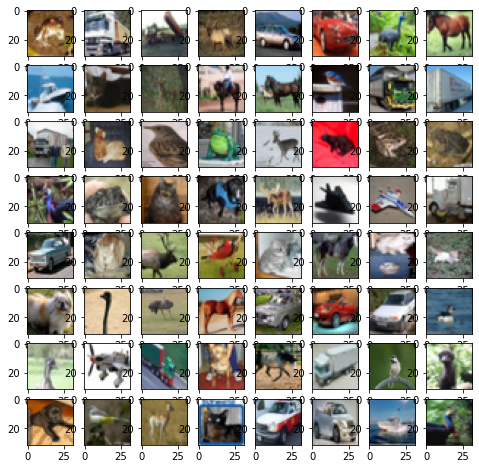

In [46]:
#plotting first 64 images of the cifar 10 to get a view how are the images..
fig=plt.figure(figsize=(8,8))
for i in range(64):
  ax=fig.add_subplot(8,8,i+1)
  ax.imshow(trainX[i],cmap=plt.cm.bone)
plt.show  

In [47]:
from tensorflow.keras import models

In [48]:
from tensorflow.keras.layers import Conv2D,BatchNormalization,MaxPool2D,Dropout,Dense,Flatten

In [49]:
Model=models.Sequential()

In [50]:
#creating a sequential keras model ...
Model.add(BatchNormalization(input_shape=trainX.shape[1:]))
Model.add(Conv2D(64,(5,5),padding='same',activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

Model.add(Conv2D(128,(5,5),padding='same',activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

Model.add(Conv2D(256,(5,5),padding='same',activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

Model.add(Dropout(0.2))

Model.add(Flatten())
Model.add(Dense(256,activation='relu'))
Model.add(Dense(10,activation='softmax'))

In [51]:
Model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 256)         819456    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 256)        

In [52]:

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
#compiling the formed sequential model with adam optimizer and loss = categorical_crossentropy as we have one 
#hot encoded labels..
Model.compile(optimizer= Adam(learning_rate=1e-3),loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
#batch_size=64
#epochs=30
Model.fit(trainX,trainY,epochs=30,batch_size=64,validation_data=(testX,testY))

Epoch 1/30
782/782 [==============================] - 21s 26ms/step - loss: 1.4023 - accuracy: 0.4943 - val_loss: 1.1079 - val_accuracy: 0.6071
Epoch 2/30
782/782 [==============================] - 20s 25ms/step - loss: 0.9763 - accuracy: 0.6575 - val_loss: 0.9132 - val_accuracy: 0.6809
Epoch 3/30
782/782 [==============================] - 20s 25ms/step - loss: 0.8084 - accuracy: 0.7170 - val_loss: 0.8609 - val_accuracy: 0.7076
Epoch 4/30
782/782 [==============================] - 20s 25ms/step - loss: 0.6848 - accuracy: 0.7593 - val_loss: 0.8406 - val_accuracy: 0.7135
Epoch 5/30
782/782 [==============================] - 20s 25ms/step - loss: 0.5859 - accuracy: 0.7943 - val_loss: 0.7671 - val_accuracy: 0.7449
Epoch 6/30
782/782 [==============================] - 20s 25ms/step - loss: 0.4960 - accuracy: 0.8246 - val_loss: 0.7566 - val_accuracy: 0.7488
Epoch 7/30
782/782 [==============================] - 20s 25ms/step - loss: 0.4247 - accuracy: 0.8485 - val_loss: 0.8249 - val_accuracy:

In [55]:
Model.save("cifar-10-detection-model.h5")

In [ ]:
#we can see get a acuracy on training data = 97.53% after our 30 iterations and an accuracy of 74.09% at 
#validating or testing data we can increase the accuracy by chagning the hyperparameters and using some 
#callbacks while fitting the model..
#i am leaving this model at this accuracy only , but you are always free to play around with hyperparameter..